In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from gis_functions import *
import geopandas as gpd

In [ ]:
#steyr=pd.read_excel('half-way/steyr.xlsx')
#karn=pd.read_excel('half-way/Karn.xlsx')
#tirol=pd.read_excel('half-way/tirol.xlsx')
#oebo=gpd.read_file('half-way/oebo.gpkg')
#sbg=pd.read_excel('half-way/SBG.xlsx')
#noe=pd.read_excel('half-way/noe.xlsx')

### oebo

In [ ]:
gdf=oebo[oebo.EW60<=50]
#perform geo manipulations
joined=sjoin(gdf, 'oebo_KKA')
#extract data
extracted=extract_data_oebo(joined)
#reinsert 
final=final_merge_oebo(extracted, 'oebo_KKA')

### steyr

In [ ]:
data=steyr[steyr.PE<=50]
merged=join_nospat(data, 'steyr')
extracted=extract_data_nospat(merged)
final=final_merge_nospat(extracted, 'steyr_KKA')

### tirol

In [ ]:
data=tirol[tirol.PE<=50]
merged=join_nospat(data, 'tirol')
extracted=extract_data_nospat(merged)
final=final_merge_nospat(extracted, 'tirol_KKA')

# salzburg

In [ ]:
data=sbg[sbg.PE<=50]
merged=join_nospat(data, 'SBG')
extracted=extract_data_nospat(merged)
final=final_merge_nospat(extracted, 'SBG_KKA')


### carinthia

In [ ]:
data=karn[karn.PE<=50]
data.KG_NR.fillna(0,inplace=True)
data.KG.fillna(0,inplace=True)
merged=join_nospat(data)
extracted=extract_data_nospat(merged)
final=final_merge_nospat(extracted, 'Karn_KKA')

### lower austria

In [ ]:
#get gdf. this combi is the correct one
gdf=geopandas.GeoDataFrame(noe, geometry=geopandas.points_from_xy((noe['RECHTSWERT']), noe['HOCHWERT'], crs='GKM34'))
#gdf.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','RECHTSWERT', 'HOCHWERT', ],inplace=True)
gdf=gdf[gdf.EW60<=50]
gdf.to_crs(epsg=4326,inplace=True)
gdf.rename(columns={'EW60_BEWILLIGT':'EW60','BEWILLIGUNGSJAHR':'INBETRIEBNAHME'},inplace=True)
#perform geo manipulations
joined=sjoin(gdf, 'noe')
extracted=extract_data_noe(joined)
final=final_merge_noe(extracted, 'noe_KKA')


In [2]:
steyr=geopandas.read_file('final/steyr_KKA.geojson')
karn=geopandas.read_file('final/karn_KKA.geojson')
tirol=geopandas.read_file('final/tirol_KKA.geojson')
oebo=geopandas.read_file('final/oebo_KKA.geojson')
sbg=geopandas.read_file('final/sbg_KKA.geojson')
noe=geopandas.read_file('final/noe_KKA.geojson')


In [3]:
files=[steyr,noe,oebo,tirol,sbg,karn,oebo]

In [4]:
cols=['BL','KG','GKZ','before_reg', 'freq',
       'mean_year', 'sum_PE','PE_nonitri','%PE_nonitri', '%before_reg', '%no_nitri' ,'geometry']


In [5]:
steyr=steyr.loc[:,cols]
karn=karn.loc[:,cols]
tirol=tirol.loc[:,cols]
oebo=oebo.loc[:,cols]
sbg=sbg.loc[:,cols]
noe=noe.loc[:,cols]
files=[steyr,karn, tirol,sbg,noe, oebo] 

In [6]:
data=pd.concat(files)

<AxesSubplot:>

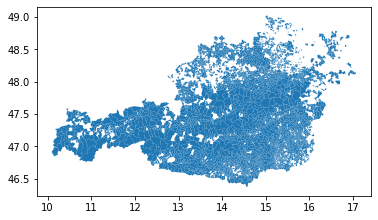

In [7]:
data.plot()

In [8]:
#rename BLS
data.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)


In [9]:
with open('final/complete_KKA.geojson', 'w') as f:
    f.write(data.to_json())